In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import synchrony.PlottingTools as plottingTools
from synchrony.ParameterSet import ParameterSet
import synchrony.DataStorage as dataStorage
import synchrony.DataAnalysis as dataAnalysis
import synchrony.MakeDataframe as makeDataframe
from synchrony import mainClass

In [2]:
regime = 4 # options 1, 2, 3, 4

file_path_input_params_json = '../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'Paper/Fig_02/Time_traces/regime'+str(regime)
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

file_path /home/berger/Data/Synchrony/Paper/Fig_02/Time_traces/regime4
parameter_path /home/berger/Data/Synchrony/Paper/Fig_02/Time_traces/regime4/parameter_set.csv


In [3]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

# Make data frame from time traces

In [4]:
data_frame = makeDataframe.make_dataframe(file_path)
time_traces_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_time_traces')

v_init_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_init_events')
v_init = v_init_data_frame.iloc[0]['v_init']
t_init_list = v_init_data_frame['t_init'].to_numpy()
# print(v_init)

if regime is not 1: 
    v_d_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_div_events')
    print(v_d_data_frame['v_b'])
data_frame

['/home/berger/Data/Synchrony/Paper/Fig_02/Time_traces/regime4/time_traces_regime_4_v2',
 '/home/berger/Data/Synchrony/Paper/Fig_02/Time_traces/regime4/Fig_3B.pdf']
0     1.443097
1     1.419141
2     1.430397
3     1.406944
4     1.455293
5     1.438294
6     1.483705
7     1.439337
8     1.395861
9     1.341927
10    1.396002
11    1.408392
12    1.419710
13    1.411613
14    1.428738
15    1.443218
16    1.398169
Name: v_b, dtype: float64


,simu_name,simu_path,sub_simu_name,sub_simu_path,path_parameter_file,path_dataset,n_series,id,git_version,doubling_rate,...,block_production_onset,block_production_offset,f_crit,high_rate_dars2,dars2_rate_indep_density,cv_division_position,independent_division_cycle,version_of_independent_division_regulation,version_of_coupled_division_regulation,division_volume
0,time_traces_regime_4_v2,/home/berger/Data/Synchrony/Paper/Fig_02/Time_...,vary_growth_rate_0,/home/berger/Data/Synchrony/Paper/Fig_02/Time_...,/home/berger/Data/Synchrony/Paper/Fig_02/Time_...,/home/berger/Data/Synchrony/Paper/Fig_02/Time_...,1,0,4df118328b1c1f2480f9fa5849276c749a16c5e9,1.5,...,0.11,0.18,0.5,600.0,0.0,0.0,0.0,IDA,cooper,2.828427


In [5]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

time = np.array(time_traces_data_frame["time"])
volume = np.array(time_traces_data_frame["volume"])
n_ori = np.array(time_traces_data_frame["n_ori"])
active_fraction = np.array(time_traces_data_frame["activation_potential"])
# print(time.size)
if regime == 1:
    t_0 = time[volume==v_init_data_frame.iloc[0]['v_init']]
    indx_0 = np.where(time==t_0)[0][0]
    t_f_0 = time[volume==v_init_data_frame.iloc[-1]['v_init']] + 0.1 * 1/data_frame.iloc[0]['doubling_rate']
    indx_f, t_f = find_nearest(time, t_f_0)
    print('indx and value', indx_f, t_f)
#     print(np.where(time==np.round(t_f,2)[0]))
#     indx_f = np.where(time==np.round(t_f,2)[0])[0][0]
elif regime == 3:
    t_0 = time[volume==v_d_data_frame['v_b'][7]]
    indx_0 = np.where(time==t_0)[0][0]
    t_f = time[volume==v_d_data_frame['v_b'][13]]
    indx_f = np.where(time==t_f)[0][0]
else:
    t_0 = time[volume==v_d_data_frame['v_b'][7]]
    indx_0 = np.where(time==t_0)[0][0]
    t_f = time[volume==v_d_data_frame['v_b'][10]]
    indx_f = np.where(time==t_f)[0][0]

# print(indx_0, indx_f)

n_ori_cut = n_ori[indx_0:indx_f]
if regime ==1:
    n_ori_cut[n_ori_cut <= 1] = np.nan
time_cut = time[indx_0:indx_f]
volume_cut = volume[indx_0:indx_f]
active_fraction_cut = active_fraction[indx_0:indx_f]

t_init_list_cut_1 = t_init_list[t_init_list>t_0]
t_init_list_cut = t_init_list_cut_1[t_init_list_cut_1<t_f]

t_b_list = np.array(v_d_data_frame['t_d'])

t_b_cut_1 = t_b_list[t_b_list>=t_0]
# t_b = t_init_list_cut + data_frame.iloc[0]['t_CD']
t_b_cut = t_b_cut_1[t_b_cut_1<=t_f]
print(t_b_cut, t_f)
print(t_init_list_cut)

[6.3506 6.9878 7.6166 8.3213] [8.3213]
[6.6164 6.6399 7.3211 7.3466 7.9963 8.0009]


# Plot time traces

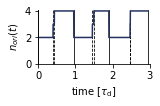

In [6]:
label_list = [r'$n_{ori}(t)$']
legend_bool_list = [0]
# legend_list = [' ', ' ', r'$\langle f \, \rangle = {}$'.format(np.round(dataAnalysis.calculate_average_active_fraction(data_frame, 3, 0), 2))]
x_axes_list = [time_cut]
y_axes_list = [n_ori_cut]
color_list = [dark_blue]
fig, ax = plt.subplots(1, figsize=(2,1))
plt.xlabel(r'time [$\tau_{\rm d}$]')
y_min_list = [0,0,0,0]
y_max_list = [1, 1.2, 1.2, 1.2]
item = 0
doubling_time = 1/data_frame.iloc[0]['doubling_rate']
# for item in range(0, len(label_list)):
ax.set_ylabel(label_list[item])
ax.plot(x_axes_list[item], y_axes_list[item], color=color_list[item])
ax.set_ylim(ymin=0)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.margins(0)
for t_div in t_b_cut:
    ax.axvline(x=t_div, 
                      ymin=y_min_list[item],
                      ymax=y_max_list[item],
                         c="black",
                      zorder=0, 
                      linewidth=0.8,
                      clip_on=False)
for t_init in t_init_list_cut:
    ax.axvline(x=t_init, 
                      ymin=y_min_list[item],
                      ymax=y_max_list[item],
                         c="black",
                      zorder=0, 
                      linewidth=0.8,
                      linestyle='--',
                      clip_on=False)
#         ax[item].axvspan(t_init, 
#                  t_init + data_frame.iloc[0]['period_blocked'], 
#                   ymin=y_min_list[item],
#                   ymax=y_max_list[item],
#                  alpha=0.3, 
#                  color='red', 
#                  linewidth=0.8,
#                  clip_on=False)
#         ax[item].axvspan(t_init, 
#                  t_init + data_frame.iloc[0]['t_doubling_datA'], 
#                   ymin=y_min_list[item],
#                   ymax=y_max_list[item],
#                  alpha=0.3, 
#                  color='blue', 
#                  linewidth=0.8,
#                  clip_on=False)
        
# ax[0].set_yticks([0,v_init])
# ax[0].set_yticklabels(['0',r'$v^\ast$'])
# ax[0].get_yticklabels()[1].set_color(green)
# ax[0].axhline(y=v_init, color=green, linestyle='--')
# if data_frame.iloc[0]["doubling_rate"] <= 0.5:
#     ax.set_yticks([0,1,2])
#     ax.set_yticklabels([r'0',r'1', r'2'])
    
# elif data_frame.iloc[0]["doubling_rate"] <= 1.5:
#     ax.set_yticks([0,2,4])
#     ax.set_yticklabels([r'0',r'2', r'4'])
# else:
#     ax.set_yticks([0,4,8])
#     ax.set_yticklabels([r'0',r'4', r'8'])
    
# ax[2].axhline(y=0.5, color=pinkish_red, linestyle='--')
# ax[2].set_yticks([0, data_frame.iloc[0]['frac_init']])
# ax[2].set_yticklabels(['0', r'$f^\ast$'])
# ax[2].get_yticklabels()[1].set_color(pinkish_red)
# ax[2].set_yticks([0, 0.5, 1])
# ax[2].set_yticklabels(['0', r'$f^\ast$', '1'])
# ax[2].get_yticklabels()[1].set_color(pinkish_red)
ax.tick_params(bottom=True, labelbottom=True)
ax.tick_params(axis='x', colors='black')
if regime == 1:
    ax.set_yticks([0,10])
    ax.set_yticklabels([r'0',r'10'])
    ax.set_xticks([time_cut[0], 
                      time_cut[0]+ doubling_time * 0.1
                     ])
    ax.set_xticklabels(['0', '0.1'])
    ax.axvline(x=time[volume==v_init_data_frame.iloc[-1]['v_init']], color='red')
    
if regime == 3:
    ax.set_yticks([0,1, 2,4])
    ax.set_yticklabels([r'0',r'1', r'2', r'4'])
    ax.set_xticks([time_cut[0], 
                      time_cut[0]+ doubling_time, 
                      time_cut[0]+ 2*doubling_time,
                      time_cut[0]+ 3*doubling_time,
                      time_cut[0]+ 4*doubling_time,
                      time_cut[0]+ 5*doubling_time,
                   time_cut[0]+ 6*doubling_time
                     ])
    ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6'])
if regime == 2 or regime==4:
    ax.set_yticks([0,2, 4])
    ax.set_yticklabels([r'0', r'2', r'4'])
    ax.set_xticks([time_cut[0], 
                  time_cut[0]+ doubling_time, 
                  time_cut[0]+ 2*doubling_time,
                  time_cut[0]+ 3*doubling_time
                 ])
    ax.set_xticklabels(['0', '1', '2', '3'])
plt.savefig(file_path + '/Fig_3B.pdf', format='pdf', bbox_inches='tight')